In [113]:
import os, glob
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [114]:
def get_datetime(df):
    index = []
    for ij in range(len(df)):
        doy = str(df.loc[ij,2])
        doy.rjust(3 + len(doy), '0')
        year = str(df.loc[ij,1])
        hr = str(round(df.loc[ij,3]/100.0))
        index.append(datetime.strptime(year + "-" + doy + "-" + hr, "%Y-%j-%H"))
    return index

In [115]:
top_dir='../data/'

i=0
for in_file in sorted(glob.iglob(f'{top_dir}'+'SNOW*.dat')):
    print(in_file)
    i = i+1
    tmp = pd.read_csv(in_file,header=None, squeeze=True)
    tmp.index = get_datetime(tmp)
    if i == 1:
        SNOW=tmp 
    else:
        SNOW = pd.concat([SNOW,tmp],ignore_index=False)
        
SNOW = SNOW[~SNOW.index.duplicated(keep='first')]
SNOW.columns = ["RECORD",'year','doy','hr','sec','BATT','PILL','RTNRT_Tot',
                'AirTemp','MaxAirTemp','MinAirTemp','AvgAirTemp','DEPTH',
                'Q','SWDWN_W','SWUP_W','Albedo']

../data/SNOW_2022-01-02_2022-01-26.dat
../data/SNOW_2022-01-26_2022-02-08.dat
../data/SNOW_2022-02-08_2022-02-17.dat
../data/SNOW_2022-03-24_2022-04-14.dat
../data/SNOW_2022-04-14_2022-05-10.dat
../data/SNOW_2022-05-10_2022-07-20.dat
../data/SNOW_2022-07-20_2022-09-09.dat
../data/SNOW_2022-09-09_2022-10-18.dat
../data/SNOW_2022-10-18_2022-10-25.dat


In [116]:
# Convert snow pillow raw to SWE
SNOW['SWE'] = (SNOW.PILL-1.056)*20*25.40 # convert to SWE (mm)

In [117]:
# adjust PILL, DEPTH, and AirTemp for offset applied on 10/10/2022
start = datetime(2022,10,10,15,0,0); end = SNOW.index[-1]
SNOW['SWE'][start:end] = (SNOW['PILL'][start:end]/1000.0-1.056)*20*25.40
SNOW['DEPTH'][start:end] = SNOW['DEPTH'][start:end]/25.4
SNOW['AirTemp'][start:end] = SNOW['AirTemp'][start:end]/25.4

Text(0, 0.5, 'precip')

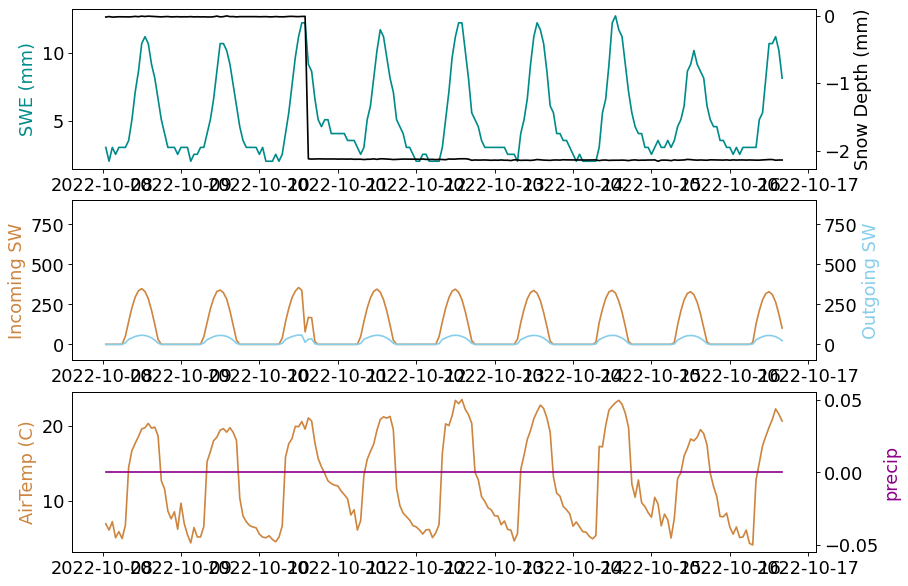

In [118]:
stdate = datetime(2022,10,8,1,0,0); endate = datetime(2022,10,16,16,0,0)

plt.figure(num=None, figsize=(12, 9), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 16})
ax1 = plt.subplot(3,1,1)
ax1.plot(SNOW['SWE'][stdate:endate],c='darkcyan')
ax1.set_ylabel('SWE (mm)',c='darkcyan')
ax2 = ax1.twinx()
ax2.plot(-SNOW['DEPTH'][stdate:endate],c='k')
ax2.set_ylabel('Snow Depth (mm)',c='k')

ax1 = plt.subplot(3,1,2)
ax1.plot(SNOW['SWDWN_W'][stdate:endate],c='peru')
ax1.set_ylabel('Incoming SW',c='peru')
ax1.set_ylim([-100,900])
ax2 = ax1.twinx()
ax2.plot(SNOW['SWUP_W'][stdate:endate],c='skyblue')
ax2.set_ylabel('Outgoing SW',c='skyblue')
ax2.set_ylim([-100,900])

ax1 = plt.subplot(3,1,3)
ax1.plot(SNOW['AirTemp'][stdate:endate],c='peru')
ax1.set_ylabel('AirTemp (C)',c='peru')
ax2 = ax1.twinx()
ax2.plot(SNOW['RTNRT_Tot'][stdate:endate],c='darkmagenta')
ax2.set_ylabel('precip',c='darkmagenta')
